In [ ]:
import sys
sys.path.append('../')

from src import customFunc as cf, ansatzes as anz

from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Estimator
import numpy as np
import matplotlib.pyplot as plt

SparsePauliOp(['ZZ'],
              coeffs=[1.+0.j])


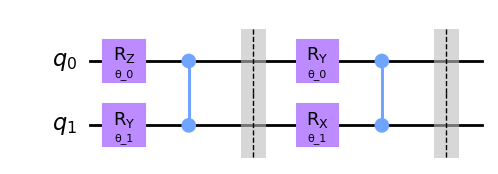

In [23]:
observable = SparsePauliOp.from_list([("ZZ",1)])
print(observable)

estimator = Estimator()

ansatz_circuit, n_params = anz.build_Surf_ansatz(2,2)

display(ansatz_circuit.draw("mpl"))

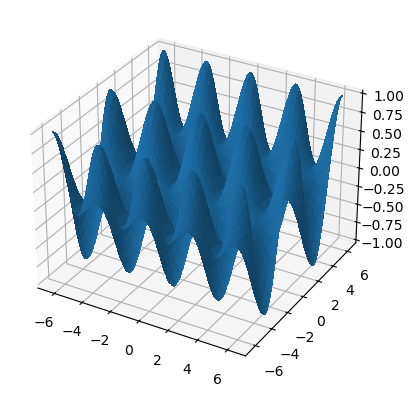

In [24]:
# Vectors for grid
resolution = 100

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X = np.linspace(-2*np.pi, 2*np.pi, resolution) # Theta 0 axis
Y = np.linspace(-2*np.pi, 2*np.pi, resolution) # Theta 1 axis

Z = np.zeros((resolution, resolution))

for i in range(resolution):
    for j in range(resolution):
        params = [X[i], Y[j]]
        Z[i,j] = cf.evaluate_observable(params, ansatz_circuit, observable, estimator)

X, Y = np.meshgrid(X, Y)


# Plot the surface.
surf = ax.plot_surface(X, Y, Z, linewidth=0, antialiased=False)

plt.show()
